In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

api_key = "594de577cef9e1dac6216ad80511c028"

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

609

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

response_list = []
useless_cities = []

for city in cities:
    query = requests.get(query_url + city).json()
    if query['cod'] != '404':
        response_list.append(query)
    else:
        useless_cities.append(city)
        
for city in useless_cities:
    cities.remove(city)

len(response_list)

550

In [14]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
    
for response in response_list:
    cloudiness.append(response['clouds']['all'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    humidity.append(response['main']['humidity'])
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    wind_speed.append(response['wind']['speed'])
    
print("Dictionary columns created")

Dictionary columns created


In [15]:
weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sanandaj,0,IR,1562123322,34,35.31,47.00,18.0,2.10
1,lebu,100,ET,1562123547,92,8.96,38.73,12.9,2.56
2,jamestown,9,AU,1562123033,65,-33.21,138.60,14.3,4.58
3,oranjemund,0,ZA,1562123549,72,-28.55,16.43,13.6,7.46
4,santa maria,0,BR,1562123550,67,-16.02,-48.01,17.0,1.00


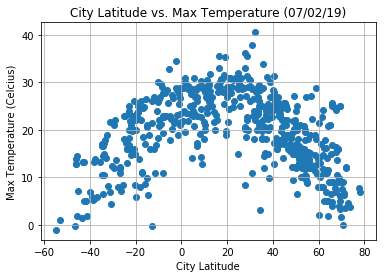

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature (07/02/19)")
plt.ylabel("Max Temperature (Celcius)")
plt.xlabel("City Latitude")
plt.grid(True)

plt.savefig("Max_Temp_By_Latitude.png")

plt.show()

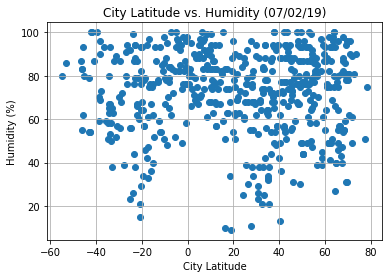

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (07/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid(True)

plt.savefig("Humidity_By_Latitude.png")

plt.show()

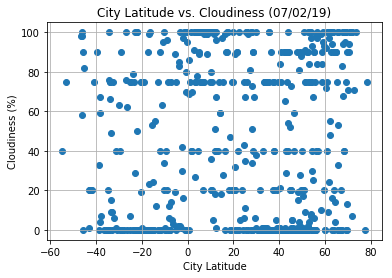

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (07/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)

plt.savefig("Humidity_By_Latitude.png")

plt.show()

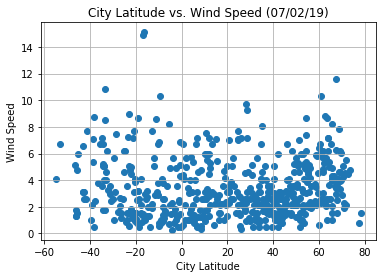

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed (07/02/19)")
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.grid(True)

plt.savefig("Humidity_By_Latitude.png")

plt.show()

In [21]:
print('THREE OBSERVABLE TRENDS:')
print('')
print('FIRST: CITIES NEAR THE EQUATOR ARE EXPERIENCING HIGHER TEMPERATURES THAN CITIES NEAR THE POLES')
print('SECOND: CITIES WITH LOW HUMIDITY ARE CONCENTRATED IN THE MID LATITUDES')
print('THIRD: WIND SPEED AND CLOUDINESS APPEAR TO BE EVENLY DISTRIBUTED ACROSS DIFFERENT LATITUDES')

THREE OBSERVABLE TRENDS:

FIRST: CITIES NEAR THE EQUATOR ARE EXPERIENCING HIGHER TEMPERATURES THAN CITIES NEAR THE POLES
SECOND: CITIES WITH LOW HUMIDITY ARE CONCENTRATED IN THE MID LATITUDES
THIRD: WIND SPEED AND CLOUDINESS APPEAR TO BE EVENLY DISTRIBUTED ACROSS DIFFERENT LATITUDES
